# 웹 데이터 분석

## 2. 웹 크롤링으로 데이터 수집

---------------------

### 자신의 PC 폰트 목록 가져오기

In [ ]:
#(Mac) 폰트 목록 가져오기
import matplotlib.font_manager as fm

font_list_mac = fm.OSXInstalledFonts()
print(f'Mac 폰트 목록 : {font_list_mac}')

In [24]:
#(windows) 폰트 목록 가져오기
import matplotlib.font_manager as fm
font_list_win = fm.findSystemFonts(fontpaths=None, fontext='ttf')
print(f'windows 폰트 목록 : {font_list_win}')

windows 폰트 목록 : ['C:\\Windows\\Fonts\\FZYTK.TTF', 'C:\\Users\\yswoo\\AppData\\Local\\Microsoft\\Windows\\Fonts\\BinggraeSamanco-Bold.otf', 'C:\\Users\\yswoo\\AppData\\Local\\Microsoft\\Windows\\Fonts\\SB 어그로 B.ttf', 'C:\\Users\\yswoo\\AppData\\Local\\Microsoft\\Windows\\Fonts\\SCDream4.otf', 'C:\\Windows\\Fonts\\taile.ttf', 'C:\\Windows\\Fonts\\phagspa.ttf', 'C:\\Windows\\Fonts\\LFAXI.TTF', 'C:\\Windows\\Fonts\\GILC____.TTF', 'C:\\Windows\\Fonts\\LBRITEI.TTF', 'C:\\Windows\\Fonts\\wingding.ttf', 'C:\\Windows\\Fonts\\GOUDOSB.TTF', 'C:\\Windows\\Fonts\\HANBatangExt.ttf', 'C:\\Windows\\Fonts\\SIMYOU.TTF', 'C:\\Windows\\Fonts\\LeelawUI.ttf', 'C:\\Windows\\Fonts\\SitkaVF-Italic.ttf', 'C:\\Windows\\Fonts\\trebuc.ttf', 'C:\\Windows\\Fonts\\TCMI____.TTF', 'C:\\Windows\\Fonts\\CALIST.TTF', 'C:\\Windows\\Fonts\\Gabriola.ttf', 'C:\\Windows\\Fonts\\HARLOWSI.TTF', 'C:\\Windows\\Fonts\\HANBatang.ttf', 'C:\\Windows\\Fonts\\ntailu.ttf', 'C:\\Windows\\Fonts\\H2MJRE.TTF', 'C:\\Windows\\Fonts\\BOD_BLAI.T

In [27]:
import matplotlib.pyplot as plt
#(Mac한글 폰트 지정하기) 
# plt.rcParams['font.family'] = 

#(windows)한글 폰트 지정하기
plt.rcParams['font.family'] = 'Malgun Gothic'

---------------------

## 01.정적 크롤링(스크래핑)

### 라이브러리 설치하기

In [ ]:
# 정적 크롤링을 위한 requests 설치
!pip install requests   

In [ ]:
# HTML과 XML 문서를 파싱하기 위한 파이썬 패키지
!pip install beautifulsoup4 

In [ ]:
# 동적 크롤링을 위한 셀레니움 설치
!pip install selenium      

### 라이브러리 확인하기

In [ ]:
import requests

requests.get("https://www.naver.com")

In [ ]:
import requests

response = requests.get("https://google.com")

# 응답 상태
print('#응답 상태: ', response.status_code)

# 응답 바이너리 원문
print('#응답 바이너리 원문: ', response.content)

# 응답 UTF-8로 인코딩된 문자열
print('#응답 UTF-8로 인코딩된 문자열: ', response.text)

# 응답 헤더
print('#응답 헤더: ', response.headers)

# 응답 헤더: 콘텐트 유형
print('#응답 헤더유형: ', response.headers['Content-Type'])

-------------------------------

### [실습] 할리스 커피매장 정보 수집하기

 - 매장정보 : https://www.hollys.co.kr/store/korea/korStore2.do?pageNo=2&sido=&gugun=&store=

In [22]:
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd
import datetime

MAX = 100    # 총 가져올 건수
FILE = './data/hollys_매장정보.csv'

#[CODE 1]
def hollys_store(result):
    cnt, MAX_flag = 0, False
    for page in range(1,59):
#         Hollys_url = 'https://www.hollys.co.kr/store/korea/korStore.do?pageNo=%d&sido=&gugun=&store=' %page
        Hollys_url = 'https://www.hollys.co.kr/store/korea/korStore2.do?pageNo=%d&sido=&gugun=&store=' %page
        print(Hollys_url)
        html = urllib.request.urlopen(Hollys_url)
        soupHollys = BeautifulSoup(html, 'html.parser')
        tag_tbody = soupHollys.find('tbody')
        for store in tag_tbody.find_all('tr'):
            if len(store) <= 3:
                break
            store_td = store.find_all('td')
            store_name = store_td[1].string
            store_sido = store_td[0].string
            store_address = store_td[3].string
            store_phone = store_td[5].string
            result.append([store_name]+[store_sido]+[store_address]
                          +[store_phone])
            cnt += 1 
            print(f'[{cnt:0>3}] {store_name}  \t {store_sido}')
            if cnt == MAX: 
                MAX_flag = True
                break
        if MAX_flag:
            break
                
    return

#[CODE 0]
def main():
    result = []
    print('Hollys store crawling >>>>>>>>>>>>>>>>>>>>>>>>>>')
    hollys_store(result)   #[CODE 1] 호출 
    hollys_tbl = pd.DataFrame(result, columns=('store', 'sido-gu', 'address','phone'))
    hollys_tbl.to_csv(FILE, encoding='cp949', mode='w', index=True)
    del result[:]
    return hollys_tbl
       

df = main()
df

Hollys 커피매장 crawling >>>>>>>>>>>>>>>>>>>>>>>>>>
https://www.hollys.co.kr/store/korea/korStore2.do?pageNo=1&sido=&gugun=&store=
[001] 강변역점  	 서울 광진구
[002] 용산아이파크몰점  	 서울 용산구
[003] 부산서부터미널점  	 부산 사상구
[004] 춘천강원대점  	 강원 춘천시
[005] 송도대홍프라자점  	 인천 연수구
[006] 순천조례점  	 전남 순천시
[007] 진주혁신도시점  	 경남 진주시
[008] 논산내동점  	 충남 논산시
[009] 오류동점  	 서울 구로구
[010] 부천역점  	 경기 고양시 일산동구
https://www.hollys.co.kr/store/korea/korStore2.do?pageNo=2&sido=&gugun=&store=
[011] 화성병점점  	 경기 화성시
[012] 군산은파유원지DI점  	 전북 군산시
[013] 잠실학원사거리점  	 서울 송파구
[014] 구미시청점  	 경북 구미시
[015] 화성향남DT점  	 경기 화성시
[016] 발산역점  	 서울 강서구
[017] 목동파리공원점  	 서울 양천구
[018] 인천한길안과병원점  	 인천 부평구
[019] 북한산DI점  	 서울 은평구
[020] 울산시청점  	 울산 남구
https://www.hollys.co.kr/store/korea/korStore2.do?pageNo=3&sido=&gugun=&store=
[021] 울산성남점  	 울산 중구
[022] 구미상모사곡점  	 경북 구미시
[023] 신도림테크노마트점  	 서울 구로구
[024] 제주황사평DT점  	 제주 제주시
[025] KG타워점  	 서울 중구
[026] 올림픽공원역점  	 서울 송파구
[027] 길동포유르센티점  	 서울 강동구
[028] 서귀포대정점  	 제주 서귀포시
[029] 목동삼성쉐르빌점  	 서울 양천구
[030] 신촌역점  	 서울 마포구
https://ww

,store,sido-gu,address,phone
0,강변역점,서울 광진구,"서울 광진구 구의강변로 64, 구의아크로리버 1층 구의동 589-10",070-7802-0303
1,용산아이파크몰점,서울 용산구,"서울특별시 용산구 한강대로23길 55 (한강로3가, 용산역) 4층",02-2012-0473
2,부산서부터미널점,부산 사상구,"부산광역시 사상구 사상로 201 (괘법동, 서부시외버스터미널) .",051-323-0305
3,춘천강원대점,강원 춘천시,강원특별자치도 춘천시 서부대성로 229 (효자동) .,033-253-0425
4,송도대홍프라자점,인천 연수구,인천광역시 연수구 해돋이로152번길 9 (송도동) .,032-710-3810
...,...,...,...,...
95,삼성전자평택캠퍼스점,경기 평택시,경기도 평택시 삼성로 144 고덕면 여염리 1648,031-8094-9981
96,천안아산역사점,충남 아산시,충청남도 아산시 배방읍 희망로 100 (천안아산역) 3층 맞이방,.
97,분당미금점,경기 성남시 중원구,경기도 성남시 분당구 미금일로90번길 24 (구미동) B1F ~ 1F,031-713-7739
98,부산서구청점,부산 서구,부산광역시 서구 보수대로 9 (충무동1가 3-1) 바른빌딩 1층 104호,070-4647-1455


### [실습] 텍스트 빈도수로 워드클라우드 만들기
- **사이킷런 CountVectorizer클래스 사용 : 단어 빈도수 추출**
- **단, 한글에서 불용어 처리 및 가중치 처리 등 자연어 텍스트 전처리에 필요한 여러 가지 방법은 여기서 다루지 않는다.**

In [ ]:
!pip install scikit-learn

In [ ]:
import sklearn
sklearn.__version__

[('서울', 27), ('경기', 24), ('충남', 8), ('부산', 7), ('고양시', 7), ('전북', 5), ('울산', 5), ('전주시', 4), ('제주', 4), ('일산동구', 4)]


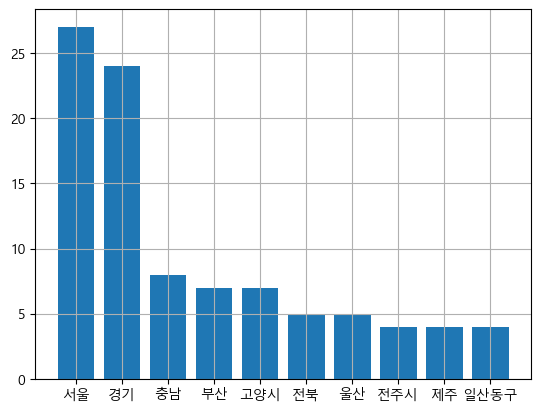

<Figure size 640x480 with 0 Axes>

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def get_wordTokenCount(corpus):
    from sklearn.feature_extraction.text import CountVectorizer
    
    # 기사제목을 토큰화
    vect = CountVectorizer().fit(corpus)  
    count = vect.transform(corpus).toarray().sum(axis=0) 

    # 토큰 빈도수로 정렬하고 토큰명 추출
    idx = np.argsort(-count)  # 내림 정렬하여 인덱스 반환: 토큰의 인덱스
    count = count[idx]        # 토큰의 빈도수
    feature_name = np.array(vect.get_feature_names_out())[idx]  # 토큰값
    
    # 빈도수 많은 순서대로 토큰명 10개만 출력
    print(list(zip(feature_name, count))[:10])
   
    return feature_name, count


def draw_wordTokenCountGraph(data, freq):    
    plt.bar(data, freq)
    plt.grid()
    plt.show()

    # 그래프 그림 저장히기
    plt.savefig(f'image/{keyword}_bar_graph.png')
    
    
# 기사제목을 말뭉치로 사용
corpus = df['sido-gu'].to_list()
# print(corpus)

# 기사제목을 토큰화하여 빈도수 가져오기
feature_name, count = get_wordTokenCount(corpus)

# 단어(토큰) 빈도 수_Bar그래프 그리기 : 상위 10개
draw_wordTokenCountGraph(feature_name[:10], count[:10])


### [실습] (수집된 데이터) 토큰 빈도수 출력하기

In [30]:
data = dict(zip(feature_name, count))
token_df = pd.DataFrame(data, index=[1])
token_df

# token_df.to_csv('data/token.csv', index=False, encoding="utf-8-sig")  

,서울,경기,충남,부산,고양시,전북,울산,전주시,제주,일산동구,...,연수구,대구,논산시,노원구,울주군,남양주시,유성구,은평구,대전,흥덕구
1,27,24,8,7,7,5,5,4,4,4,...,1,1,1,1,1,1,1,1,1,1


### [실습] (수집된 데이터) 토큰 빈도수 워드클라우드로 시각화
- 워드클라우드 입력데이터 : 딕셔너리 타입

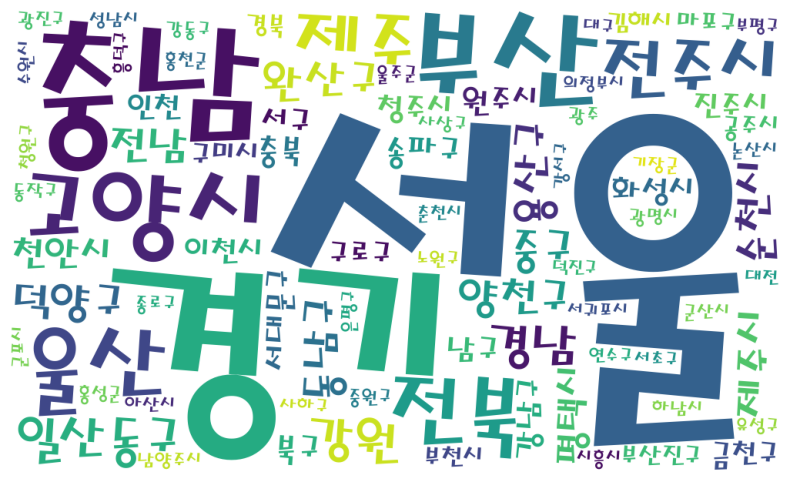

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,6)

# 자신의 컴퓨터 환경에 맞는 한글 폰트 경로를 설정(window에서)
# font_path = 'malgun'  # C:/Windows/Fonts/
font_path = 'HMKMMAG' # C:/Windows/Fonts/HMKMMAG.TTF

# (토큰명, 빈도수) 딕셔너리 타입으로 변환
data = dict(zip(feature_name, count))

# 워드클라우드로 그래프로 시각화
wc = WordCloud(width = 1000, height = 600, background_color="white", font_path=font_path)
plt.imshow(wc.generate_from_frequencies(data)) #딕셔너리
plt.axis("off")
plt.show()

# 파일로 저장하기
wc.to_file(f'image/{keyword}_워드클라우드.png')

-----

## 03.동적 크롤링

- https://chromedriver.chromium.org/
- 최신 chrome webdriver 다운로드
- 해당 위치에 WebDriver폴더 만들고 exe파일 옮겨놓는다.
-  (C:/python/master/WebDriver/chromedriver.exe)
- 자신의 크롬 웹 브라우저의 버전을 확인하고 버전에 맞는 것을 다운로드해야한다.

#### # webdriver 동작 테스트하기
- 자신의 크롬 웹 브라우저의 버전을 확인하고 버전에 맞는 것을 다운로드해야한다. 그렇지 않으면 오류가 발생한다.
- 아래 코드를 실행시키면 크롬 브라우져가 잠깐 실행되었다 닫힌다.

In [33]:
from selenium import webdriver

# chromedriver.exe 파일이 있는 경로
driver = './WebDriver/chromedriver.exe'
wd = webdriver.Chrome(driver)

wd.get('https://www.naver.com/')

wd.close()  # 브라우저가 실행되었다가 자동으로 닫힌다.

C:\Users\yswoo\AppData\Local\Temp\ipykernel_17784\3813851145.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  wd = webdriver.Chrome(driver)


### [실습]  커피빈매장 정보 크롤링하여 파일로 저장하기

- 아래 사이트를 이용해 호출해야할 자바스크립트 함수를 확인하다.
- https://www.coffeebeankorea.com
- https://www.coffeebeankorea.com/store/store.asp
- (매장 번호로) 자세히보기: javascript:storePop2('374'); 

In [36]:
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd
import datetime

from selenium import webdriver
import time

MAX = 10     # 추출 데이터 건수
FILE = './data/CoffeeBean_매장정보.csv'

#[CODE 1] 
def getStoreInfo():
    CoffeeBean_URL = "https://www.coffeebeankorea.com/store/store.asp"
    wd = webdriver.Chrome('./WebDriver/chromedriver.exe')
    
    result = []  # 데이터 저장 변수
    total, cnt = 370, 0      
    for i in range(1, total+1):  #매장 수 만큼(370) 반복        
        wd.get(CoffeeBean_URL)
        time.sleep(1)  #웹페이지 연결할 동안 1초 대기
        try:
            wd.execute_script("storePop2(%d)" %i)
            time.sleep(1) #스크립트 실행 할 동안 1초 대기
            
            html = wd.page_source
            soupCB = BeautifulSoup(html, 'html.parser')
            store_name_h2 = soupCB.select("div.store_txt > h2")
            store_name = store_name_h2[0].string  #매장 이름
            
            store_info = soupCB.select("div.store_txt > table.store_table > tbody > tr > td")
            store_address_list = list(store_info[2])
            store_address = store_address_list[0]  #매장 주소
            
            store_phone = store_info[3].string     #매장 전화번호
            result.append([store_name]+[store_address]+[store_phone])  
            cnt += 1
            # 매장정보 가져온 데이터 출력하기
            print("[%3d] %3d - %s" % (cnt, i, store_name))            
            
             # MAX값에 해당하는 건수 만큼만 실행하기
            if cnt >= MAX: 
                break
            
        except:
            continue

    return result

#---------------
# main
#---------------
#[CODE 0]
def main():
    result = []
    print('CoffeeBean store crawling >>>>>>>>>>>>>>>>>>>>>>>>>>')
    result = getStoreInfo()  #[매장 추출 함수]호출하기   #[CODE 1] 호출 
    coffeebean_tbl = pd.DataFrame(result, columns=('store', 'address','phone'))
    coffeebean_tbl.to_csv(FILE, encoding='cp949', mode='w', index=True)  # 파일로 저장하기
    del result[:]
    return coffeebean_tbl


df = main() #[CODE 0] 호출
df.head()

CoffeeBean store crawling >>>>>>>>>>>>>>>>>>>>>>>>>>


C:\Users\yswoo\AppData\Local\Temp\ipykernel_17784\2025347095.py:15: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  wd = webdriver.Chrome('./WebDriver/chromedriver.exe')


[  1]   3 - 차병원점
[  2]   6 - 강남대로점
[  3]  12 - 청담에스점
[  4]  13 - 신사점
[  5]  15 - 역삼점
[  6]  16 - 양재스포타임점
[  7]  17 - 청담성당점
[  8]  18 - 영동점
[  9]  19 - 도곡점
[ 10]  20 - 영동고앞점


,store,address,phone
0,차병원점,서울시 강남구 논현로 566 강남차병원1층,02-538-7615
1,강남대로점,서울시 서초구 강남대로 369 1층,02-588-5778
2,청담에스점,"서울시 강남구 압구정로 461 네이처포엠빌딩B108,109호",02-548-6052
3,신사점,서울시 강남구 도산대로 126,02-548-2741
4,역삼점,"서울시 강남구 논현로 512 지상1,2층",02-569-8051


--------------

끝